C:\Users\abuhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
C:\Users\abuhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\anndata\utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


✅ Selected library ID: spaceranger130_count_44214_6800STDY12499407_GRCh38-2020-A


100%|██████████| 4992/4992 [01:50<00:00, 45.12/s] 


Fitting CellPie ...
Adding factor values to adata.obs ...


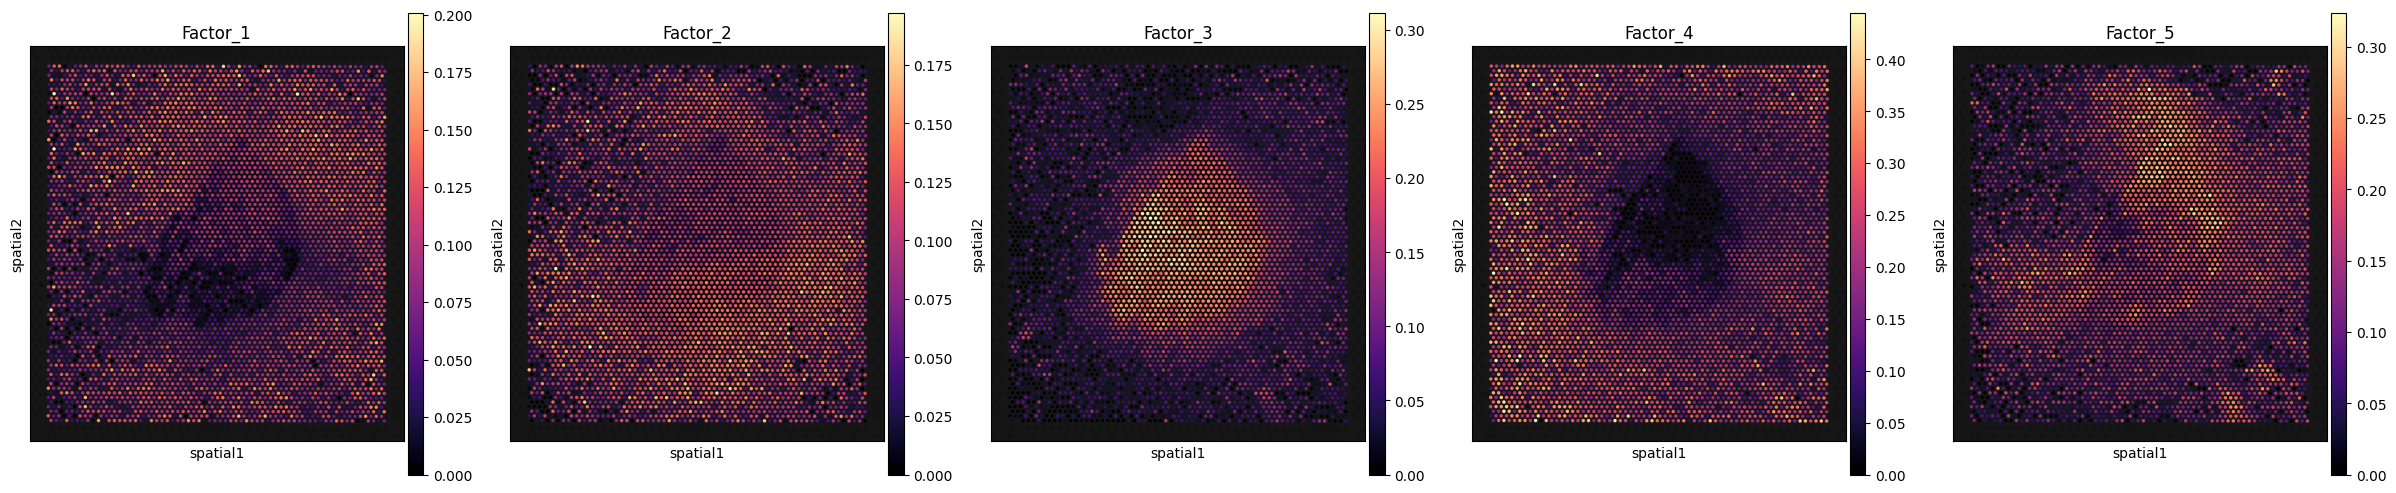

✅ Done. Results saved to 'kidney_cellpie_factors.csv' and 'kidney_cellpie_output.h5ad'


In [1]:
# ✅ 0. Setup
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import mean_squared_error
from cellpie_main import intNMF
from cp_utils import preprocess_data_visium

# ✅ 1. Load kidney dataset (downloaded .h5ad)
adata = sc.read_h5ad("6800STDY12499407.h5ad")

# ✅ 2. Manually select correct library ID
library_id = "spaceranger130_count_44214_6800STDY12499407_GRCh38-2020-A"
print(f"✅ Selected library ID: {library_id}")

# ✅ 3. Create Squidpy ImageContainer using high-res image
img = sq.im.ImageContainer(
    adata.uns["spatial"][library_id]["images"]["hires"],
    scale=adata.uns["spatial"][library_id]["scalefactors"]["tissue_hires_scalef"]
)

# ✅ 4. Extract image features using Squidpy
sq.im.calculate_image_features(
    adata,
    img,
    features="summary",
    key_added="features",
    library_id=library_id  # ✅ Required to avoid ambiguity
)

# ✅ 5. Preprocess gene expression + image features
adata = preprocess_data_visium(adata)

# ✅ 6. Run CellPie (intNMF) with k=5 topics
model = intNMF(adata, n_topics=5, epochs=30, init="random")
model.fit(adata)

# ✅ 7. Visualize spatial topic proportions (pass library_id manually)
sel_clust = [f"Factor_{i+1}" for i in range(5)]
with mpl.rc_context({'figure.figsize': (5, 6), 'axes.facecolor': 'black'}):
    sc.pl.spatial(
        adata,
        cmap='magma',
        color=sel_clust,
        ncols=5,
        size=1,
        img_key='hires',
        alpha_img=0.1,
        library_id=library_id
    )

# ✅ 8. Save results
adata.obs[sel_clust].to_csv("kidney_cellpie_factors.csv")
adata.write("kidney_cellpie_output.h5ad")
print("✅ Done. Results saved to 'kidney_cellpie_factors.csv' and 'kidney_cellpie_output.h5ad'")


In [2]:
adata

AnnData object with n_obs × n_vars = 4992 × 9006
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'donor_id', 'region', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_types', 'genome', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'n_cells'
    uns: 'citation', 'schema_reference', 'schema_version', 'sp